***RODOLFO VALIENTE ROMERO***

#**HW 1**

** *Code is based on course notes and was used code from the Colab examples**

This homework will get you up to speed with Python programming, numpy, matplotlib, Keras, gradients, partial derivatives, git, GitHub, Google's colaboratory etc. Have fun!

For this homework, you will create neural networks with an input layer and an output layer without any hidden layers. The connections are dense: each input neuron is connected to each output neuron.

Instructions for problems 1 and 2:
- Load the training and test data using Keras, no validation set needed.
- Train 10 classifiers that perform binary classification: *Is the input image the digit i or is it a digit different from i?* Each of the ten classifiers has an input layer consisting of 28 x 28 input neurons and an output layer consisting of a single output neuron.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.
- Use ```argmax``` to determine the classifier with the strongest output and declare the corresponding digit as output.

## Load and Explore data

### Loading the MNIST digits data set

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

### Exploring the format of the MNIST digits data set

In [9]:
train_images_original.shape

(60000, 28, 28)

In [10]:
len(train_images_original)

60000

In [11]:
train_images_original.ndim

3

In [12]:
train_labels_original

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_labels_original.shape

(60000,)

### Displaying MNIST digits

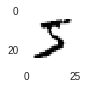

In [14]:
import matplotlib.pyplot as plt
digit_0 = train_images_original[0]
plt.figure(figsize=(1,1))
plt.imshow(digit_0)
plt.grid(None)
plt.show()

In [15]:
digit_0.shape

(28, 28)

In [16]:
label_0 = train_labels_original[0]
label_0

5

### Preparing the image data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
train_images.shape

In [0]:
train_images_original.shape

## Problem 1

Use logistic regression with mean squared error loss.

## Problem 2

Use logistic regression with binary cross entropy loss.

## Problem 3

- Load the training and test data using Keras, no validation set needed.
- Create network with an input layer consisting of 28 x 28 input neurons and an output layer consisting of 10 output neurons.
- Use softmax and categorical cross entropy loss.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.

## Problem 4

Reimplement the network from Problem 3 entirely in Keras.

In [0]:
from keras.utils import to_categorical
from keras import models
from keras import layers

import numpy as np

### Preparing the labels

In [0]:

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [25]:
train_labels.shape

(60000, 10)

In [26]:
train_labels_original.shape

(60000,)

In [27]:
np.argmax(train_labels[0])

5

In [28]:
train_labels_original[0]

5

### The network architecture

In [30]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### The compilation step

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### The training step

In [32]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2580 - acc: 0.9245 - val_loss: 0.1218 - val_acc: 0.9635
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1056 - acc: 0.9684 - val_loss: 0.0910 - val_acc: 0.9722
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0698 - acc: 0.9794 - val_loss: 0.0758 - val_acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0502 - acc: 0.9844 - val_loss: 0.0720 - val_acc: 0.9785
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0382 - acc: 0.9888 - val_loss: 0.0762 - val_acc: 0.9775
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0288 - acc: 0.9914 - val_loss: 0.0727 - val_acc: 0.9803
Epoch 7/10
60000/60000 [==============================] - 2s 35us/step - loss: 0

### Display the training/test loss/accuracy

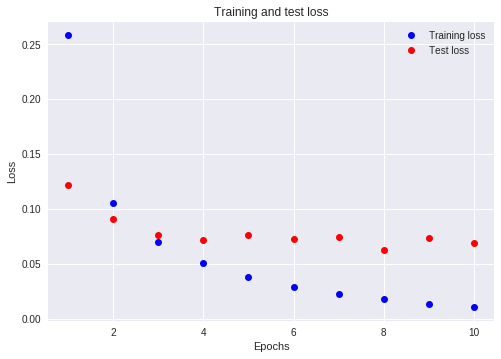

In [33]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

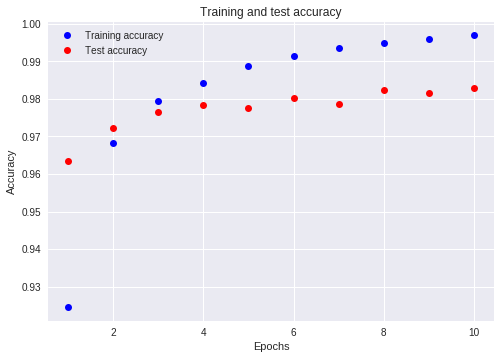

In [35]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Problem 5

Extend the network from Problem 4 by adding new features.
- Round the grey values of the images to 1 and 0 so you obtain black and white images. Add as an additional feature the number of white regions. For instance, a typical 0 has 2 white regions and 8 has 3. Use the following neighborhoods for pixels:

```
pixel x,y (indicated by .) is connected to its neighbors (indicated by o):

 o
o.o  
 o
 
ooo
o.o
ooo
```
- Consider the width.
- Consider the height.
- Come up with other features.

You should normalize your new features so that they are at the same scale as the pixel values (between 0 and 1).